# SVM Classification on Mouse Viral Study Dataset

Task is to train an SVM classifier to predict infection status based on medicine dosages given to mice.

Our goal with SVM is to create the best separating hyperplane. The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if they mouse will still be infected with the virus.

-- determine whether dataset is linearly or non-linearly separable. Which plot method did you use for this task?

-- based on your observation select a linear or nonlinear svm classifier


-- Create a train/test split. Using the train split, train the upon the  datasets using SVM classifier with the k fold cross-validation. Keep aside the test split.

-- Display average confusion matrix after the K fold CV is over.

-- report train fold accuracy and validation fold accuracy for each fold and the average CV accuracy after the K fold. Determine overfitting/underfitting for each model.  

-- Describe in your own words how you determined if there is any under/overfitting.

-- Retrain on the entire train split that you created earlier. Using this trained model, test on the dataset that you kep aside to report generalization performance.

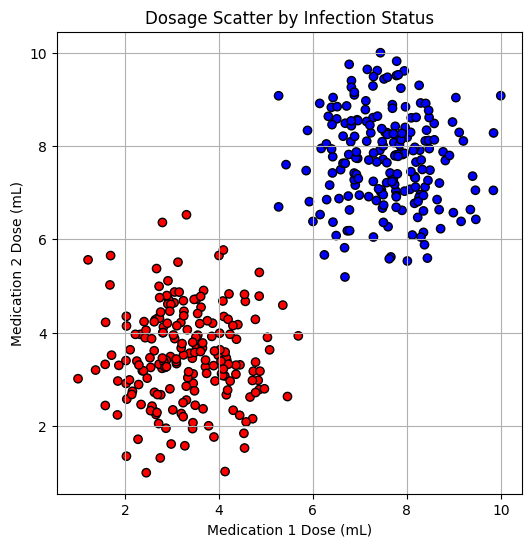

=== 5-Fold CV ===
Fold 1: Train Acc = 1.000, Val Acc = 1.000
Fold 2: Train Acc = 1.000, Val Acc = 1.000
Fold 3: Train Acc = 1.000, Val Acc = 1.000
Fold 4: Train Acc = 1.000, Val Acc = 1.000
Fold 5: Train Acc = 1.000, Val Acc = 1.000

Avg Train Acc: 1.000
Avg Val   Acc: 1.000

Avg Validation Confusion Matrix:
[[32  0]
 [ 0 32]]
w = -1.820998305437612 -1.6522793477345754 b = -0.02369091628629579


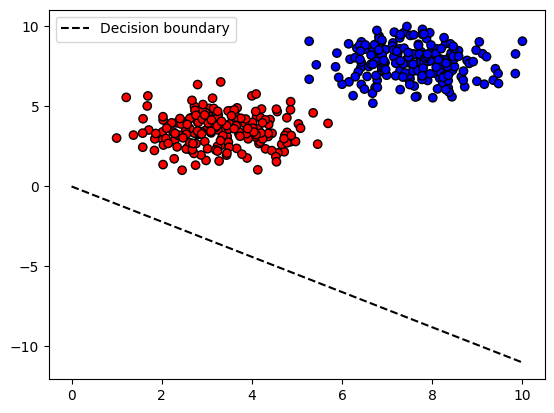


Test Set Accuracy: 1.000
Test Set Confusion Matrix:
[[40  0]
 [ 0 40]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Load the data
df = pd.read_csv('mouse_viral_study.csv')  # Ensure the file is in the same directory as the notebook
X = df[['Med_1_mL', 'Med_2_mL']].values
y = df['Virus Present'].values

# 2. Quick separability check
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel('Medication 1 Dose (mL)')
plt.ylabel('Medication 2 Dose (mL)')
plt.title('Dosage Scatter by Infection Status')
plt.grid(True)
plt.show()

# 3. Choose kernel based on plot
kernel = 'linear'    # data appear linearly separable

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 5. Build pipeline: scaler + SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel=kernel, random_state=42))
])

# 6. 5-Fold CV on training set
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_accs, val_accs = [], []
cms = []

print("=== 5-Fold CV ===")
for fold, (tr_idx, val_idx) in enumerate(kf.split(X_train, y_train), start=1):
    X_tr, X_val = X_train[tr_idx], X_train[val_idx]
    y_tr, y_val = y_train[tr_idx], y_train[val_idx]
    
    pipeline.fit(X_tr, y_tr)
    y_tr_pred = pipeline.predict(X_tr)
    y_val_pred = pipeline.predict(X_val)
    
    tr_acc = accuracy_score(y_tr, y_tr_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    train_accs.append(tr_acc)
    val_accs.append(val_acc)
    cms.append(confusion_matrix(y_val, y_val_pred))
    
    print(f"Fold {fold}: Train Acc = {tr_acc:.3f}, Val Acc = {val_acc:.3f}")

print(f"\nAvg Train Acc: {np.mean(train_accs):.3f}")
print(f"Avg Val   Acc: {np.mean(val_accs):.3f}")

# 7. Avg validation confusion matrix
avg_cm = np.mean(cms, axis=0)
print("\nAvg Validation Confusion Matrix:")
print(np.round(avg_cm).astype(int))

# 8. Retrain on all training data & test
pipeline.fit(X_train, y_train)



y_test_pred = pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print(f"\nTest Set Accuracy: {test_acc:.3f}")
print("Test Set Confusion Matrix:")
print(test_cm)
